In [4]:
import numpy as np
import pandas as pd
import matplotlib
import sklearn

## **exploring dataset**

In [5]:
src_data=pd.read_csv('datastet/train_data.csv')
src_data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [6]:
src_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [7]:
src_data.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

### **performing and generating the EDA report on the data using pandas profiling**

In [21]:
from ydata_profiling import ProfileReport

profile_report=ProfileReport(src_data, title="eda report", explorative=True)
profile_report.to_file("eda_Report.html")
print("EDA report saved successfully as eda_Report.html!")


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.89it/s]

EDA report saved successfully as eda_Report.html!


In [8]:

#dividing the train data into X and y, ie: the supporting features/variables and target feature
# y= FloodProbability
# X= ['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement','Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality','Siltation', 'AgriculturalPractices', 'Encroachments','IneffectiveDisasterPreparedness', 'DrainageSystems','CoastalVulnerability', 'Landslides', 'Watersheds','DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss','InadequatePlanning', 'PoliticalFactors', 'FloodProbability']

X=src_data.drop(columns=['FloodProbability'])
y=src_data['FloodProbability']

In [9]:
X.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,0,5,8,5,8,6,4,4,3,3,...,2,5,3,3,5,4,7,5,7,3
1,1,6,7,4,4,8,8,3,5,4,...,9,7,2,0,3,5,3,3,4,3
2,2,6,5,6,7,3,7,1,5,4,...,6,7,3,7,5,6,8,2,3,3
3,3,3,4,6,5,4,8,4,7,6,...,5,2,4,7,4,4,6,5,7,5
4,4,5,3,2,6,4,4,3,3,3,...,5,2,2,6,6,4,1,2,3,5


In [10]:
y.head()

0    0.445
1    0.450
2    0.530
3    0.535
4    0.415
Name: FloodProbability, dtype: float64

In [18]:
X.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

In [11]:
#splitted our data into train, test and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25)

### *training on the baseline ( basic models to set as a referrence to compare with) models*

1. **training on RandomForestRegressor**

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#trainig
ran_forest=RandomForestRegressor(n_estimators=100, random_state=42)
ran_forest.fit(X_train, y_train)

#predicitng on the test ddata
y_pred_RanForest=ran_forest.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_pred_RanForest, squared=False)}")
print(f"R^2: {r2_score(y_test, y_pred_RanForest)}")

RMSE: 0.030401061403143904
R^2: 0.6461105515264456


2. **XGBosst (better_performance)**

In [14]:
import xgboost as xgb

#training
xgbModel = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=300)
xgbModel.fit(X_train, y_train)

#metrics/evaluaiton
y_predXGB=xgbModel.predict(X_test)
print(f"RMSE: {mean_squared_error(y_test, y_predXGB, squared=False)}")


RMSE: 0.021334202824177608


*since we are having a total of 21 supporting variables for predicting the flood in areas, it is important that we decide that whom to give priority and whom not too*

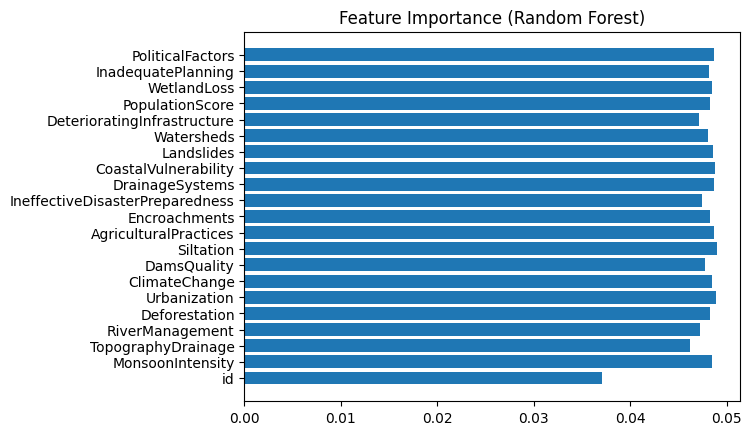

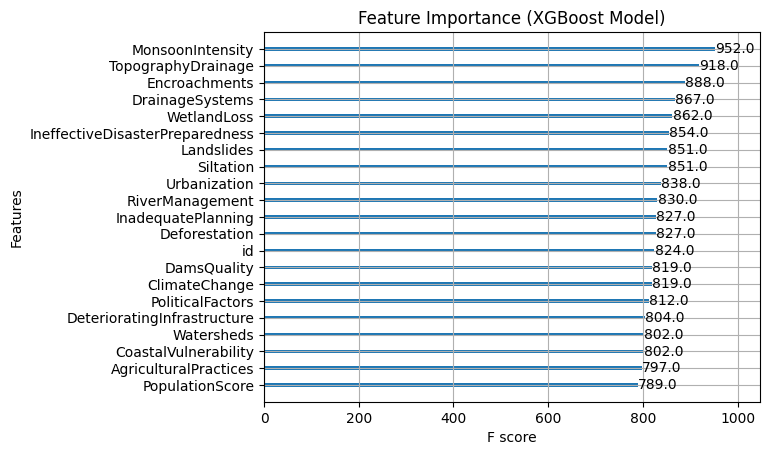

In [ ]:
import matplotlib.pyplot as plt

#For Random Forest
plt.barh(X_train.columns, ran_forest.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.show()

#For XGBoost
xgb.plot_importance(xgbModel)
plt.title("Feature Importance (XGBoost Model)")

plt.show()

*building a pytorch neural network*

In [23]:
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error

# Architecture
class FloodPred(nn.Module):
    def __init__(self, input_size=21):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.2),  # Keep dropout for MC sampling
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1))
        
    def forward(self, x):
        return self.layers(x)

# Initialize model
model = FloodPred()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Convert data to tensors (assuming X_train, X_test, y_train, y_test exist)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # ADD THIS
y_test_np = y_test.values  # For sklearn metric calculation

# Training loop
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Inference with uncertainty
model.eval()  # For deterministic behavior outside MC sampling

# Monte Carlo Dropout Sampling
mc_predictions = []
with torch.no_grad():
    # Enable dropout during inference
    model.train()
    for _ in range(20):
        pred = model(X_test_tensor)
        mc_predictions.append(pred.numpy())

mc_mean = torch.tensor(np.mean(mc_predictions, axis=0))
mc_std = torch.tensor(np.std(mc_predictions, axis=0))

# Calculate metrics
print(f"Mean RMSE: {mean_squared_error(y_test_np, mc_mean.squeeze(), squared=False)}")
print(f"Uncertainty (Avg Std Dev): {mc_std.mean().item()}")

# Save model
torch.save(model.state_dict(), "backend/models/flood_model.pth")
print("Model saved successfully")

Mean RMSE: 433.95500530962903
Uncertainty (Avg Std Dev): 1598.9112548828125
Model saved successfully
